In [10]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

In [ ]:
df = pd.read_csv('test_final.csv')

#convert the 'time' column to datetime
df['time'] = pd.to_datetime(df['time'])

#missing values using forward fill for all columns except 'Kp'
df.ffill(inplace=True)

#restore the original 'Kp' values
original_kp = pd.read_csv('test_final.csv')['Kp']
df['Kp'] = original_kp

#save filled Kp values
df.to_csv('filled_all.csv', index=False)


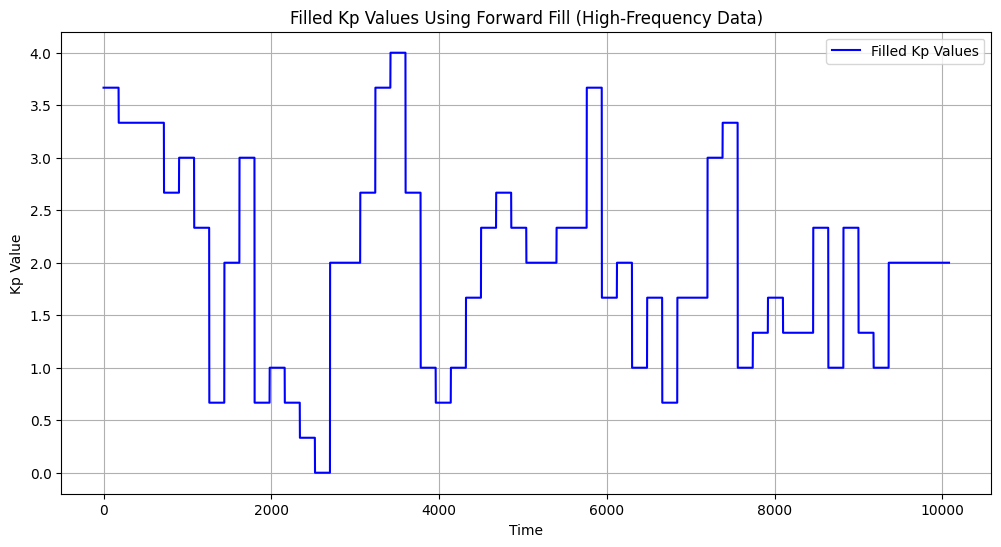

In [16]:
df = pd.read_csv('filled_all.csv')

#'time' column to datetime
df['time'] = pd.to_datetime(df['time'])

#fill missing Kp values using forward fill
df['Kp'] = df['Kp'].ffill()

#save filled Kp values
df.to_csv('filled_dataset.csv', index=False)

#visualize the filled Kp values
plt.figure(figsize=(12, 6))
plt.plot(df.index, df['Kp'], label='Filled Kp Values', color='blue')
plt.xlabel('Time')
plt.ylabel('Kp Value')
plt.title('Filled Kp Values Using Forward Fill (High-Frequency Data)')
plt.legend()
plt.grid(True)
plt.show()

In [11]:
df = pd.read_csv('filled_dataset.csv')

In [12]:
print(df.columns)

Index(['time', 'sample_count', 'proton_vx_gse', 'proton_vy_gse',
       'proton_vz_gse', 'proton_vx_gsm', 'proton_vy_gsm', 'proton_vz_gsm',
       'proton_speed', 'proton_density', 'proton_temperature',
       'old_packet_time_flag', 'fill_flag', 'proton_peak_unresolved_flag',
       'proton_peak_unbounded_flag', 'reduced_proton_quality_flag',
       'bad_proton_speed_flag', 'bad_proton_density_flag',
       'bad_proton_temperature_flag', 'overall_quality', 'sample_count.1',
       'bt', 'bx_gse', 'by_gse', 'bz_gse', 'theta_gse', 'phi_gse', 'bx_gsm',
       'by_gsm', 'bz_gsm', 'theta_gsm', 'phi_gsm', 'backfill_flag',
       'old_packet_time_flag.1', 'fill_flag.1', 'low_sample_count_flag',
       'overall_quality.1', 'Kp', 'status'],
      dtype='object')


In [16]:
data_types =  df.dtypes
print(data_types)

time                            object
sample_count                     int64
proton_vx_gse                  float64
proton_vy_gse                  float64
proton_vz_gse                  float64
proton_vx_gsm                  float64
proton_vy_gsm                  float64
proton_vz_gsm                  float64
proton_speed                   float64
proton_density                 float64
proton_temperature             float64
old_packet_time_flag             int64
fill_flag                        int64
proton_peak_unresolved_flag      int64
proton_peak_unbounded_flag       int64
reduced_proton_quality_flag      int64
bad_proton_speed_flag            int64
bad_proton_density_flag          int64
bad_proton_temperature_flag      int64
overall_quality                  int64
sample_count.1                 float64
bt                             float64
bx_gse                         float64
by_gse                         float64
bz_gse                         float64
theta_gse                

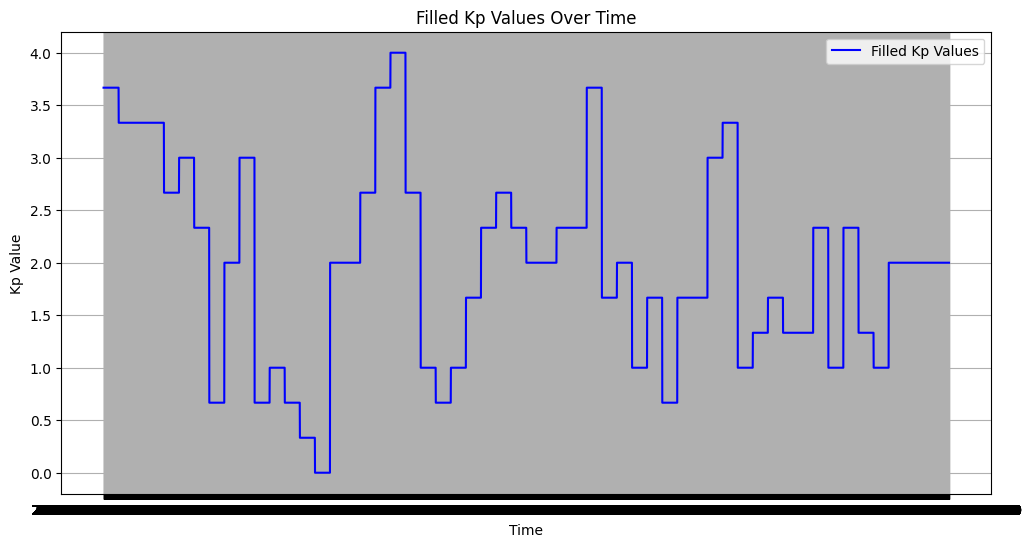

In [25]:
filled_df = pd.read_csv('filled_dataset.csv')

plt.figure(figsize=(12, 6))
plt.plot(filled_df['time'], filled_df['Kp'], label='Filled Kp Values', color='blue')
plt.xlabel('Time')
plt.ylabel('Kp Value')
plt.title('Filled Kp Values Over Time')
plt.legend()
plt.grid(True)
plt.show()


In [30]:
#filled Kp values
filled_df = pd.read_csv('filled_dataset.csv')

#missing Kp values
original_df = pd.read_csv('filled_nokp.csv')

#missing values by filling with zeros 
filled_df = filled_df.fillna(0)
original_df = original_df.fillna(0)

#MAE
mae = mean_absolute_error(original_df['Kp'], filled_df['Kp'])
print(f"Mean Absolute Error (MAE): {mae}")

#RMSE
rmse = np.sqrt(mean_squared_error(original_df['Kp'], filled_df['Kp']))
print(f"Root Mean Square Error (RMSE): {rmse}")

#R2 Score
r2 = r2_score(original_df['Kp'], filled_df['Kp'])
print(f"R-squared (R2) Score: {r2}")

#MPE (Mean Percentage Error) with handling division by zero
mpe = np.mean(np.where(original_df['Kp'] != 0, (original_df['Kp'] - filled_df['Kp']) / original_df['Kp'], 0)) * 100
print(f"Mean Percentage Error (MPE): {mpe} %")


Mean Absolute Error (MAE): 1.9593041666666666
Root Mean Square Error (RMSE): 2.1792791433687935
R-squared (R2) Score: -178.81197673063073
Mean Percentage Error (MPE): 0.0 %


In [34]:
#filled Kp values
filled_df = pd.read_csv('filled_dataset.csv')

#missing Kp values
original_df = pd.read_csv('filled_nokp.csv')

#missing values by filling with zeros
filled_df = filled_df.infer_objects(copy=False).interpolate(method='linear')
original_df = original_df.infer_objects(copy=False).interpolate(method='linear')

#MAE
mae = mean_absolute_error(original_df['Kp'], filled_df['Kp'])
print(f"Mean Absolute Error (MAE): {mae}")

#RMSE
rmse = np.sqrt(mean_squared_error(original_df['Kp'], filled_df['Kp']))
print(f"Root Mean Square Error (RMSE): {rmse}")

#R2 Score
r2 = r2_score(original_df['Kp'], filled_df['Kp'])
print(f"R-squared (R2) Score: {r2}")

#MPE (Mean Percentage Error) with handling division by zero
mpe = np.mean(np.where(original_df['Kp'] != 0, (original_df['Kp'] - filled_df['Kp']) / original_df['Kp'], 0)) * 100
print(f"Mean Percentage Error (MPE): {mpe} %")


Mean Absolute Error (MAE): 0.3403397321428571
Root Mean Square Error (RMSE): 0.5316389138978143
R-squared (R2) Score: 0.6104904755067253
Mean Percentage Error (MPE): -11.190699160245002 %


/tmp/ipykernel_7134/3124329267.py:8: FutureWarning: DataFrame.interpolate with object dtype is deprecated and will raise in a future version. Call obj.infer_objects(copy=False) before interpolating instead.
  filled_df = filled_df.infer_objects(copy=False).interpolate(method='linear')
/tmp/ipykernel_7134/3124329267.py:9: FutureWarning: DataFrame.interpolate with object dtype is deprecated and will raise in a future version. Call obj.infer_objects(copy=False) before interpolating instead.
  original_df = original_df.infer_objects(copy=False).interpolate(method='linear')


In [40]:
#filled Kp values
filled_df = pd.read_csv('filled_dataset.csv')

#missing Kp values
original_df = pd.read_csv('filled_nokp.csv')

#only the numeric columns for filling missing values
numeric_columns = filled_df.select_dtypes(include=[np.number]).columns

#missing values with zeros
filled_df[numeric_columns] = filled_df[numeric_columns].fillna(filled_df[numeric_columns].mean())
original_df[numeric_columns] = original_df[numeric_columns].fillna(original_df[numeric_columns].mean())

#MAE
mae = mean_absolute_error(original_df['Kp'], filled_df['Kp'])
print(f"Mean Absolute Error (MAE): {mae}")

#RMSE
rmse = np.sqrt(mean_squared_error(original_df['Kp'], filled_df['Kp']))
print(f"Root Mean Square Error (RMSE): {rmse}")

#(R2) Score
r2 = r2_score(original_df['Kp'], filled_df['Kp'])
print(f"R-squared (R2) Score: {r2}")

#MPE with handling division by zero
mpe = np.mean(np.where(original_df['Kp'] != 0, (original_df['Kp'] - filled_df['Kp']) / original_df['Kp'], 0)) * 100
print(f"Mean Percentage Error (MPE): {mpe} %")


Mean Absolute Error (MAE): 0.7559198412698414
Root Mean Square Error (RMSE): 0.942835378179681
R-squared (R2) Score: -177.99999999999997
Mean Percentage Error (MPE): -2.2556912246352386e-15 %


In [3]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Read your dataset with features and Kp values
data = pd.read_csv('filled_dataset.csv')

# Exclude non-numeric columns (e.g., 'time') from the feature set
numeric_features = data.select_dtypes(include=['number'])
X = numeric_features.drop(columns=['Kp'])  # Replace 'Kp' with the actual column name
y = data['Kp']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Choose a regression model (e.g., Linear Regression)
model = LinearRegression()

# Train the model on the training data
model.fit(X_train, y_train)

# Predict Kp values on the test set
y_pred = model.predict(X_test)

# Calculate evaluation metrics
mae = mean_absolute_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)
r2 = r2_score(y_test, y_pred)

print(f"Mean Absolute Error (MAE): {mae}")
print(f"Root Mean Square Error (RMSE): {rmse}")
print(f"R-squared (R2) Score: {r2}")


Mean Absolute Error (MAE): 0.6053754123120585
Root Mean Square Error (RMSE): 0.7857586098260247
R-squared (R2) Score: 0.29243895778961704


In [20]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

df = pd.read_csv('filled_dataset.csv')

#'status' column if it exists
if 'status' in df.columns:
    df = df.drop('status', axis=1)

#'time' column to datetime
df['time'] = pd.to_datetime(df['time'], format='%Y-%m-%d %H:%M:%S')

#missing values with mean
df = df.fillna(df.mean())

#'time' and 'Kp' columns from the feature matrix X
X = df.drop(['Kp', 'time'], axis=1)

# Target variable
y = df['Kp']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#train the Random Forest model
rf_model = RandomForestRegressor(n_estimators=10, random_state=42)
rf_model.fit(X_train, y_train)

#predictions on the test set
y_pred = rf_model.predict(X_test)

#MAE
mae = mean_absolute_error(y_test, y_pred)
print(f"Mean Absolute Error (MAE): {mae}")

#RMSE
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(f"Root Mean Square Error (RMSE): {rmse}")

#(R2) Score
r2 = r2_score(y_test, y_pred)
print(f"R-squared (R2) Score: {r2}")


Mean Absolute Error (MAE): 0.12056413690476216
Root Mean Square Error (RMSE): 0.257861717365603
R-squared (R2) Score: 0.9237992303954455
